# Plot the virtual growth plate - gene expression

In [13]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [14]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clr


width = 20
height = 20
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams.update({'font.size': 30})
plt.rcParams['grid.color'] = 'w'
plt.rcParams['grid.linewidth'] = 2

In [15]:
gene = 'Runx2'

In [16]:
from pathlib import Path
folder_path = "../plots/" + gene
Path(folder_path).mkdir(parents=True, exist_ok=True)
os.chmod(folder_path, 775)

In [17]:
plotname = folder_path + '/virtual-growth_plate_' + gene

In [18]:
filename = '../data/sliced_adata.h5ad'
sliced_adata = sc.read_h5ad(filename)
sliced_adata

AnnData object with n_obs × n_vars = 3474 × 16537
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'CellType', 'ident', 'monocle3_pseudotime'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [19]:
gene_values = sliced_adata[:, gene].X.toarray()

In [20]:
vmin = np.percentile(gene_values, 10)
vmax = np.percentile(gene_values, 90)
# vmax=10

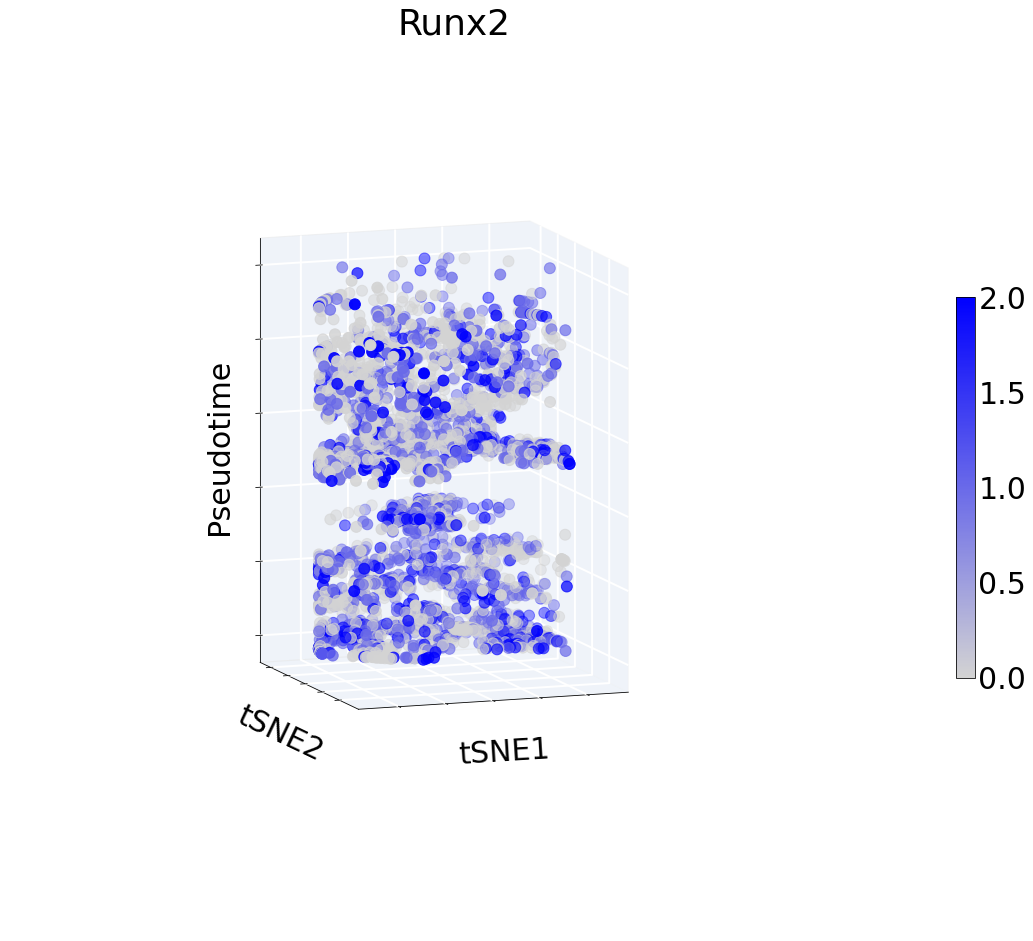

In [21]:
color_scale = ["lightgrey", "blue"]
cmap = clr.LinearSegmentedColormap.from_list('custom cmap', color_scale, N=256)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(projection = '3d')
ax.set_proj_type('ortho')

x = sliced_adata.obsm['X_tsne'][:,0]
y = sliced_adata.obsm['X_tsne'][:,1]
norm_pseudo = sliced_adata.obs['monocle3_pseudotime']/sliced_adata.obs['monocle3_pseudotime'].max()
z = 1 - np.cbrt(norm_pseudo)
celltype = sliced_adata.obs['CellType']
celltype_factorized, celltype_uniques = pd.factorize( celltype )

col = ['#636dfa', '#ef553b', '#00cc96']
color = pd.Index(col)[celltype_factorized]

ax.set_xlabel("tSNE1", labelpad=30)
ax.set_ylabel("tSNE2", labelpad=30)
ax.set_zlabel("Pseudotime", labelpad=30)

scatter = ax.scatter(x, y, z, s = 120, c = gene_values, cmap = cmap, vmin=vmin, vmax=vmax)
# scatter = ax.scatter(x, y, z, s = 120, c = gene_values, cmap = cmap)

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=1
y_scale=1
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj
"""                                                                                                                                                    
to here                                                                                                                                                
"""

ax.set_title(gene)

ax.set(yticklabels='')
ax.set(xticklabels='')
ax.set(zticklabels='')

ax.view_init(10, 70)

# Now set color to white (or whatever is "invisible")
# pane_color = [229/255,236/255,246/255]
pane_color = [224/255,233/255,245/255]
ax.xaxis.pane.set_facecolor(pane_color)
ax.yaxis.pane.set_facecolor(pane_color)
ax.zaxis.pane.set_facecolor(pane_color)

cbar = plt.colorbar(scatter, shrink=0.35)
cbar.ax.tick_params(size=0, labelsize=30)

filename = plotname + '_vector.svg'
plt.savefig(filename)

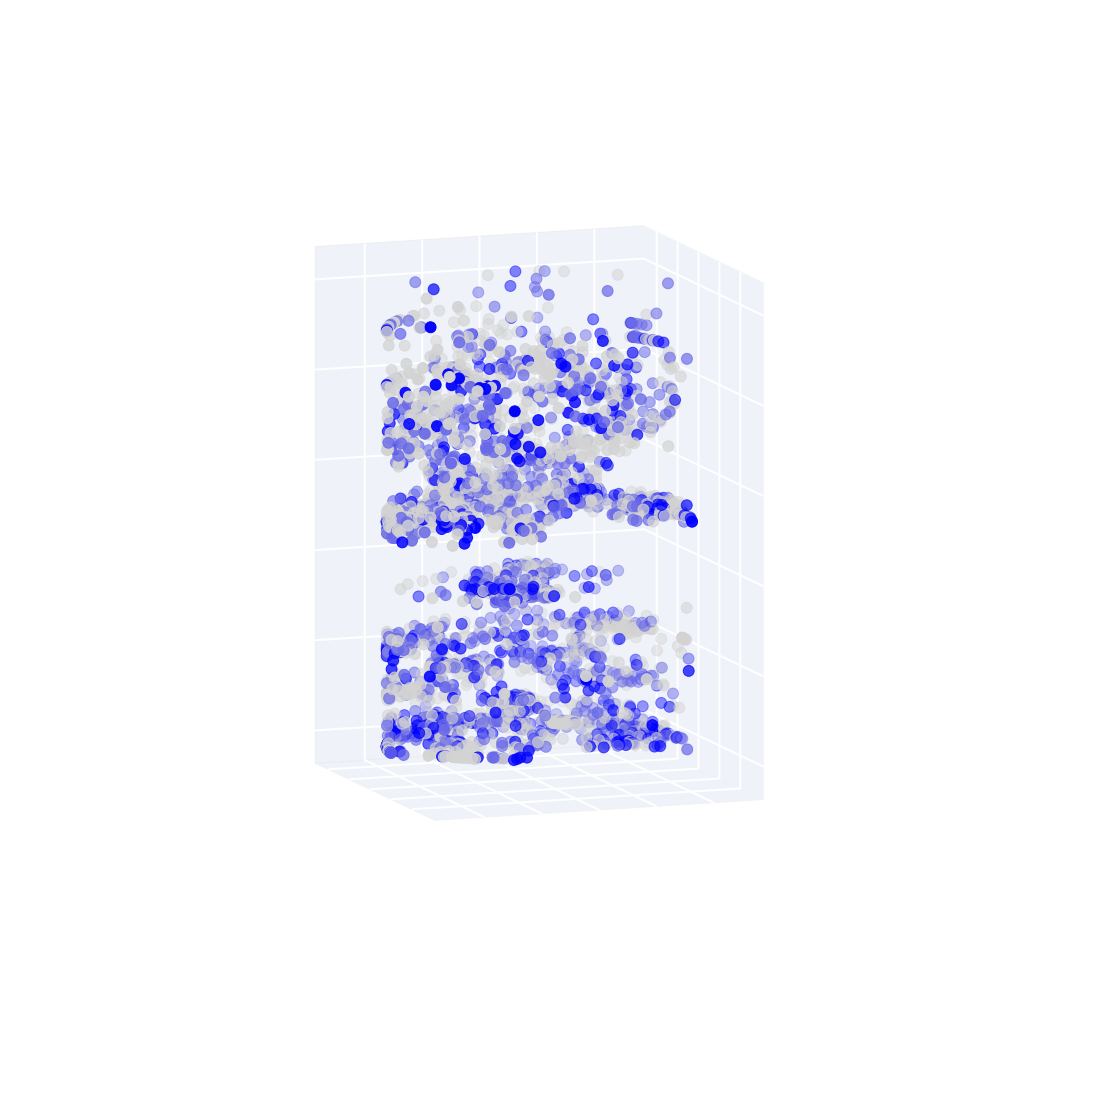

In [22]:
color_scale = ["lightgrey", "blue"]
cmap = clr.LinearSegmentedColormap.from_list('custom cmap', color_scale, N=256)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_proj_type('ortho')

x = sliced_adata.obsm['X_tsne'][:,0]
y = sliced_adata.obsm['X_tsne'][:,1]
norm_pseudo = sliced_adata.obs['monocle3_pseudotime']/sliced_adata.obs['monocle3_pseudotime'].max()
z = 1 - np.cbrt(norm_pseudo)
celltype = sliced_adata.obs['CellType']
celltype_factorized, celltype_uniques = pd.factorize( celltype )

col = ['#636dfa', '#ef553b', '#00cc96']
color = pd.Index(col)[celltype_factorized]

scatter = ax.scatter(x, y, z, s = 120, c = gene_values, cmap = cmap, vmin=vmin, vmax=vmax)
# scatter = ax.scatter(x, y, z, s = 120, c = gene_values, cmap = cmap)

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=1
y_scale=1
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj
"""                                                                                                                                                    
to here                                                                                                                                                
"""

legend_labelled = (scatter.legend_elements()[0],list(celltype.unique()))

ax.view_init(10, 70)

# Now set color to white (or whatever is "invisible")
# pane_color = [229/255,236/255,246/255]
pane_color = [224/255,233/255,245/255]
ax.xaxis.pane.set_facecolor(pane_color)
ax.yaxis.pane.set_facecolor(pane_color)
ax.zaxis.pane.set_facecolor(pane_color)

# Transparent spines from [https://stackoverflow.com/questions/59857203/remove-border-from-matplotlib-3d-pane]
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

#ax.xaxis.set_ticks([])
ax.set(xlabel=None)
ax.set(xticklabels='')
ax.xaxis.set_tick_params(color='w')

#ax.yaxis.set_ticks([])
ax.set(ylabel=None)
ax.set(yticklabels='')
ax.yaxis.set_tick_params(color='w')


ax.set(zlabel=None)
ax.set(zticklabels='')
ax.zaxis.set_tick_params(color='w')

filename = plotname + '_onlydata.png'
plt.savefig(filename, transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)

In [23]:
import plotly.express as px

x = sliced_adata.obsm['X_tsne'][:,0]
y = sliced_adata.obsm['X_tsne'][:,1]
norm_pseudo = sliced_adata.obs['monocle3_pseudotime']/sliced_adata.obs['monocle3_pseudotime'].max()
z = 1 - np.cbrt(norm_pseudo)
color = sliced_adata.obs['CellType']

fig = px.scatter_3d(x=x, y=y, z=z, color=color)
fig.update_traces(marker=dict(size=5))

# eye=dict(x=1.7, y=1.7, z=0.8)
scene=dict(camera=dict(eye=dict(x=0.9, y=1.8, z=0.1), #the default values are 1.25, 1.25, 1.25
                       center=dict(x=0, y=0, z=-0.1)),
           xaxis={'title': {'text': 'TSNE1'}},
           yaxis={'title': {'text': 'TSNE2'}},
           zaxis={'title': {'text': 'Pseudotime'}},
           #a custom aspectratio is defined as follows:
           aspectratio=dict(x=1, y=1, z=1.15)
           )

fig.layout.scene = scene

# fig.write_html(plotname + '.html')